In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv


# Cirrhosis : Causes, Symptoms and Stages

1. Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism.
 
2. Drinking too much alcohol damages the liver. Over time, this can lead to alcohol-related liver disease. Cirrhosis is the final stage of alcohol-related liver disease. It usually happens after many years of heavy drinking.
 
3. Cirrhosis is classified into four stages that include: 
**Stage I: Steatosis**

* The first stage of liver disease is characterized by inflammation of the bile duct or liver.
* As the body strives to fight against the disease or infection, abdominal discomfort is frequently the first symptom of inflammation.
* If this inflammation is not managed, it might cause damage to the liver, exacerbating the illness.
* Symptoms and inflammation are generally curable during stage I and can prevent liver disease from escalating to stage II.

**Stage II: Scarring (fibrosis) of the liver due to inflammation**

* Many people with liver illness don't realize they have it until they are at stage II or III because the first symptoms generally go unreported.
* In stage II, scarring or inflammation (damage) begins to obstruct the natural flow of blood in the liver.
* This causes the liver to be unable to function properly, but with treatment, the liver may still be capable of recovering, avoiding more damage, and slowing the progression of the liver disease.

**Stage III: Cirrhosis**

* Cirrhosis develops due to the advancement of liver disease, mainly due to lack of therapy, in which scar tissue replaces good tissue in the liver.
* This process occurs when healthy liver cells have been destroyed over time (often several years) by a progressive illness or infection.
* This causes permanent scarring of the liver, causing it to become hard and lumpy.
* The liver will eventually be unable to function because the growing scar tissue will make blood flow through the portal vein and into the liver impossible.
* When this blood is prevented from accessing the portal vein, it can flow into the spleen, causing additional problems.

**Stage IV: Liver failure or advanced liver disease or hepatic failure**

* Failure of the liver during the disease's ultimate stage will signify the end of the liver's functioning. This will necessitate quick medical intervention to avoid fatalities.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [10]:
%matplotlib inline
plt.style.use("ggplot")

In [11]:
path = '/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv'
df = pd.read_csv(path)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [13]:
# changing the age from days to years

df['Age'] = np.round(df.Age.div(365))

In [14]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,50.772727,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,10.442880,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,43.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,58.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [15]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [16]:
df.Sex.value_counts()

F    374
M     44
Name: Sex, dtype: int64

# Exploratory Data Analysis

In [17]:
# separating numerical and categorical columns apart

num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes("object").columns.tolist()

In [18]:
print(num_cols)
print(cat_cols)

['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


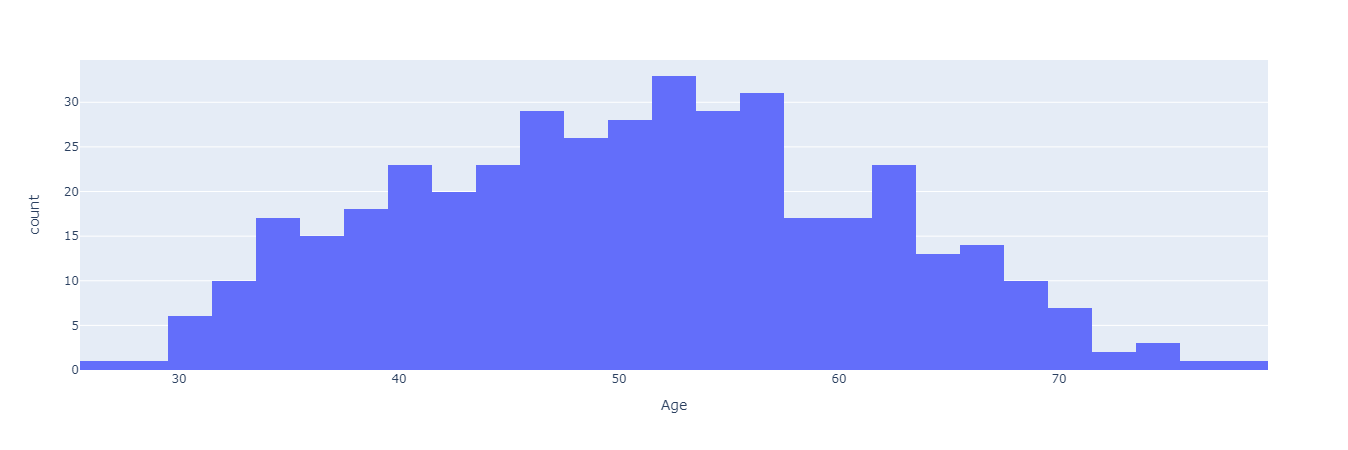

In [19]:
px.histogram(data_frame = df, x = "Age", text_auto=True)

Majority of the patients of the clinical trial were between the age of 35-65

In [20]:
pd.pivot_table(data=df, index="Status", values="N_Days", columns="Sex")

Sex,F,M
Status,,
C,2322.953488,2462.176471
CL,1600.545455,1147.666667
D,1340.503650,1584.875000


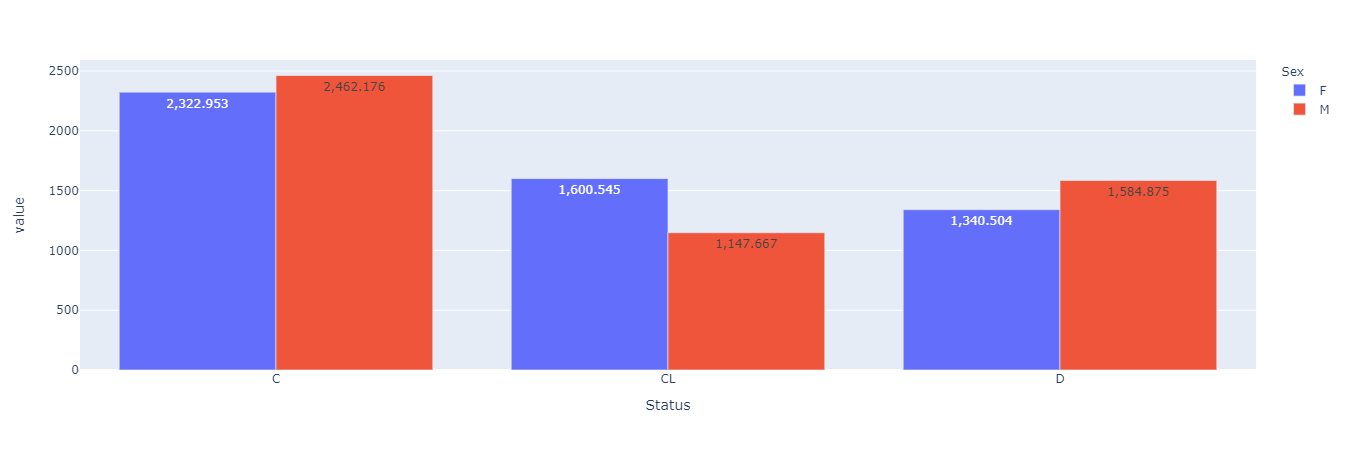

In [21]:
fig = pd.pivot_table(data=df, index="Status", values="N_Days", columns="Sex").plot(kind="bar",
                                                                             backend='plotly',
                                                                             barmode="group",
                                                                             text_auto=True)
fig.show()

1. Females had lesser number of days between registration and death compared to males
2. Males had an early liver transplant period

A more explainable reason for this outcome is that in our dataset we have rare class problem in the sex column where the females account for 374 rows and males only for 44 .
Hence the above observations are just estimates based on the current output.

In [61]:
sns.set(font_scale=1)

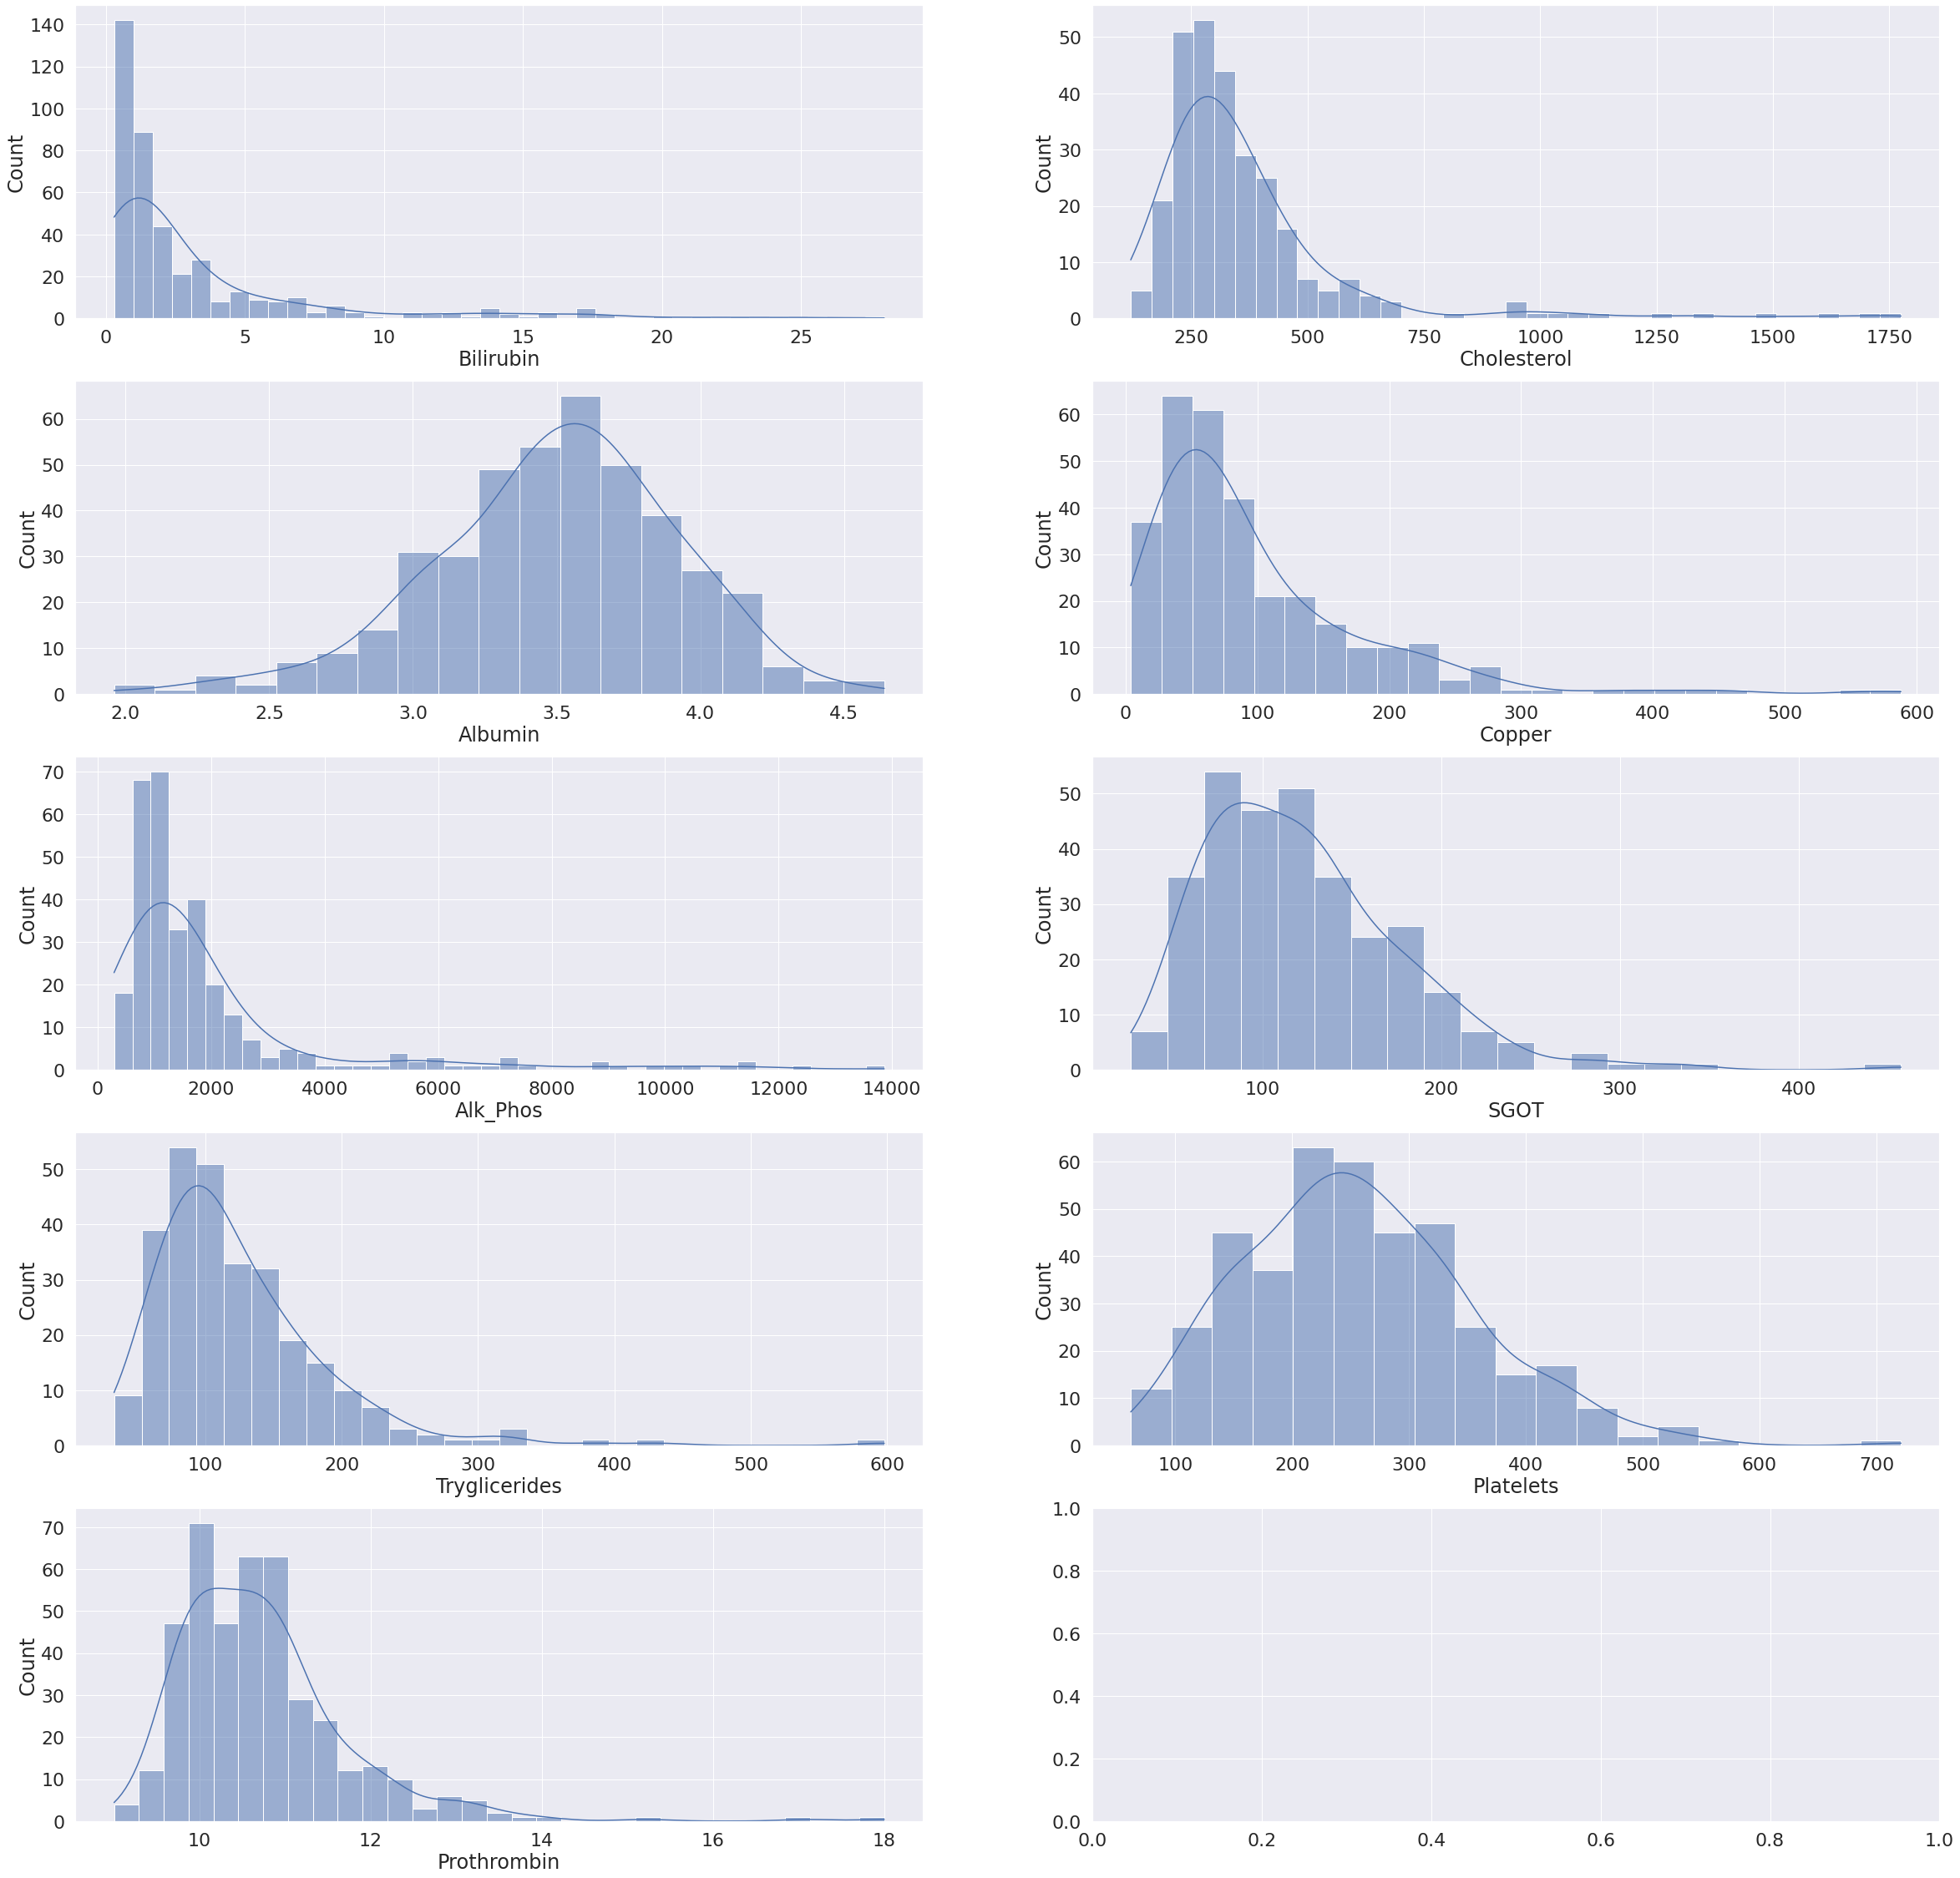

In [22]:
# plotting distributions of numerical columns

column = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
fig , ax = plt.subplots(nrows = 5,ncols=2,figsize=(40,40))
i = 0
for rows in range(5):
    for columns in range(2):
        if(i >= len(column)):
            break
        sns.histplot(data=df, x=column[i], ax = ax[rows,columns],kde=True)
        i = i + 1
        

## Infernces from the distributions
1. **Bilirubin** :  Typical results for a total bilirubin test are 1.2 milligrams per deciliter (mg/dL) for adults. There are still those who have a little                     over the normal range.
2. **Cholestrol** :  A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal. Here the patients generally have higher cholestrol levels.
3. **Albumin** : The normal range is 3.4 to 5.4 g/dL (34 to 54 g/L). Majority of pateints have normal levels of albumin
4. **Copper** : The normal range for total copper in the blood is 62 to 140 micrograms per deciliter (mcg/dL)
5. **Alk_phos** : The normal range is 44 to 147 international units per liter (IU/L) or 0.73 to 2.45 microkatal per liter (µkat/L)
6. **SGOT** : The normal range of an SGOT test is generally between 8 and 45 units per liter of serum. 
7. **Triglycerides** : count in milligrams/decilitre [mg/dl]. Normal levels range (below 150). As seen from the graph majority of patients have normal levels but there are                                significant numbers of patients having a a borderline high level (190-200) and very few having actual highlevels. 
                    
8. **Platelets** : count in per 1000 cubic ml of blood. Normal levels range is "150-450" and most of the patients have normal levels of platelets count.
9. **Prothrombin_time** : is a test to evaluate blood clotting and measured in seconds. Normal range is 11 to 13.5 seconds. We observe a majority in our normal range which                                 extends upto 14 secs. Almost neglibible numbers are in the 16-18sec timer.


<AxesSubplot:xlabel='Copper', ylabel='Density'>

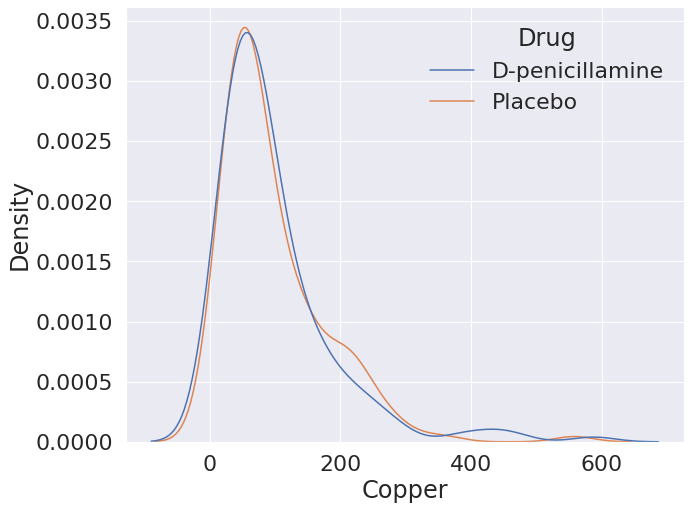

In [23]:
# analyzing drug effect
plt.figure(figsize=(10,8))
sns.kdeplot(data=df, x="Copper",hue="Drug")

Plotting the density plot for copper concentration based on the drug being tested we find a similar trend which shows that the drug wasnt effective at all.

D-Penicillamine did not appear to reduce the risk of mortality or morbidity, and led to more adverse events in patients with primary biliary cirrhosis.

In [24]:
cat_cols

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

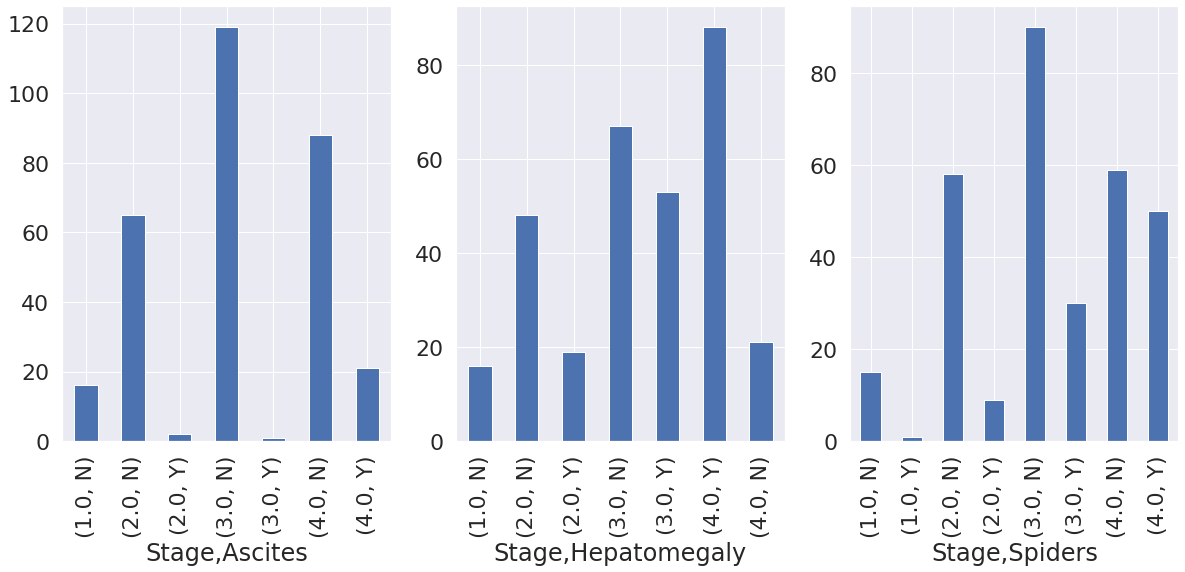

In [25]:
col_to_plot = ['Ascites', 'Hepatomegaly', 'Spiders']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,8))
for i,fig in enumerate(col_to_plot):
    df.groupby("Stage")[fig].value_counts().plot(kind="bar",ax = ax[i])

1. Ascites is only a significant present in patients at stage 4 
2. Hepatomegaly is highly present in patients at stage 3
3. Spider's presence increase with patients at higher stages  

<AxesSubplot:>

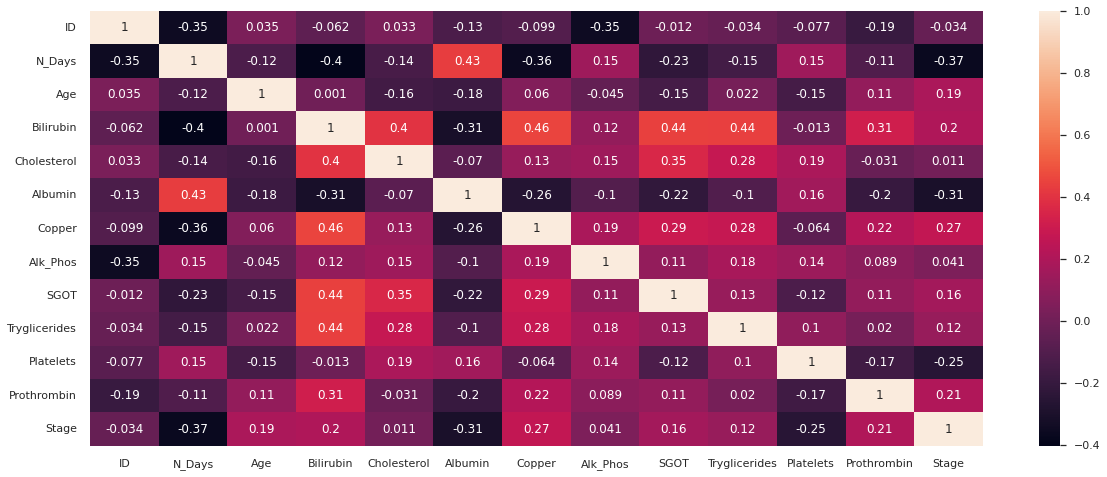

In [65]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

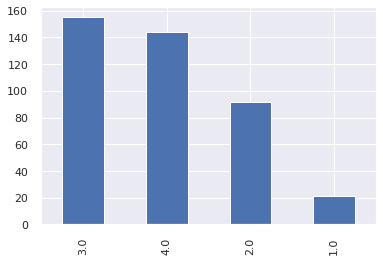

In [92]:
df.Stage.value_counts().plot(kind="bar")

We have a class imbalance problem for our target variable

# Model building

In [26]:
pip install pycaret --ignore-installed llvmlite > /dev/null

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install numba --upgrade --ignore-installed llvmlite > /dev/null

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [28]:
from pycaret.classification import *

In [29]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [33]:
data = df.copy()
data = data.drop("ID",axis = 1)

In [97]:
s = setup(data.dropna(),normalize = True,target = "Stage",n_jobs=-1)

,Description,Value
0,session_id,8036
1,Target,Stage
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(276, 19)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [81]:
pip install psutil==5.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 504.8 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.4
    Uninstalling psutil-5.9.4:
      Successfully uninstalled psutil-5.9.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
wandb 0.12.21 requires protobuf<4.0dev,>=3.12.0, but you have protobuf 4.21.12 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.3 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 4.21.12 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [128]:
models = compare_models(errors = "raise",n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5126,0.0000,0.3635,0.4464,0.4663,0.2352,0.2480,0.0090
lr,Logistic Regression,0.5074,0.6764,0.3978,0.4852,0.4851,0.2473,0.2562,0.0230
lda,Linear Discriminant Analysis,0.5074,0.6964,0.3969,0.4902,0.4841,0.2517,0.2645,0.0110
et,Extra Trees Classifier,0.5034,0.6931,0.3890,0.4816,0.4779,0.2387,0.2447,0.2770
rf,Random Forest Classifier,0.4818,0.6948,0.3493,0.4556,0.4453,0.1974,0.2056,0.2760
catboost,CatBoost Classifier,0.4774,0.6911,0.3552,0.4466,0.4544,0.2026,0.2072,4.9640
svm,SVM - Linear Kernel,0.4711,0.0000,0.3702,0.4685,0.4519,0.2183,0.2294,0.0380
gbc,Gradient Boosting Classifier,0.4566,0.6455,0.3362,0.4354,0.4362,0.1775,0.1826,0.2220
ada,Ada Boost Classifier,0.4521,0.7011,0.3333,0.4298,0.4227,0.1839,0.1982,0.0570
knn,K Neighbors Classifier,0.4421,0.6816,0.3287,0.4581,0.4332,0.1739,0.1787,0.0700


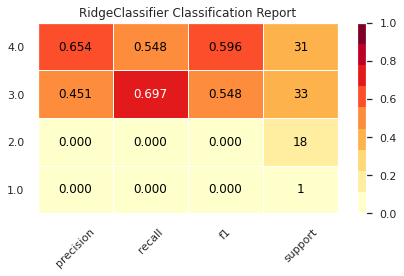

In [129]:
plot_model(models[0],plot = 'class_report')

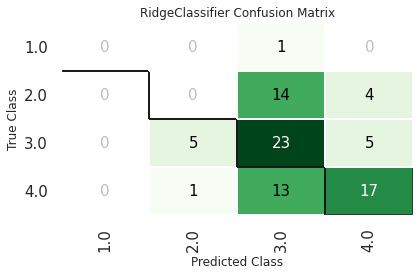

In [130]:
plot_model(models[0],plot = "confusion_matrix")

In [133]:
predict_model(models[0],raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4819,0,0.3113,0.4235,0.4405,0.1685,0.1800


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Drug_Placebo,Sex_F,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage,Label
0,-1.064432,-1.386581,1.748889,1.002046,-0.471483,-0.428485,-0.093728,0.506768,1.275364,0.450725,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,3
1,-0.597636,-0.086601,1.151141,0.750530,0.535590,-0.210467,-0.422884,0.080481,0.443398,0.376120,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2
2,1.885305,-0.179457,-0.428622,-0.417797,0.151943,-0.267840,0.094165,-0.023950,-0.680487,1.644413,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,4
3,-0.460801,1.120523,-0.236489,0.048722,-0.015902,-0.577655,-0.450771,0.480232,0.954254,-0.828226,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,4
4,0.560262,-0.643735,-0.556711,-0.571952,-0.375571,-0.520282,-0.171446,0.533304,-0.622103,0.589279,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.883430,0.749100,-0.193793,-0.182509,-0.375571,0.799300,-0.180132,0.984414,-0.870234,1.473887,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4
79,1.352689,-0.550880,-0.492667,0.158253,0.223876,-0.818622,-0.139902,0.719055,0.633145,0.759805,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3
80,2.197080,-0.179457,-0.449970,0.000042,0.319789,-0.761249,1.570427,-0.945345,-0.490740,-0.561778,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3
81,-0.488515,-1.572292,-0.407274,-0.231190,0.032053,-0.061297,-0.170531,-0.878235,0.676932,-0.007565,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,3


In [134]:
predict_model(models[1],raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4337,0.6544,0.2859,0.4184,0.4109,0.1059,0.1119


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage,Label,Score_0,Score_1,Score_2,Score_3
0,-1.064432,-1.386581,1.748889,1.002046,-0.471483,-0.428485,-0.093728,0.506768,1.275364,0.450725,...,0.0,1.0,0.0,0.0,4.0,3,0.0015,0.1940,0.6209,0.1837
1,-0.597636,-0.086601,1.151141,0.750530,0.535590,-0.210467,-0.422884,0.080481,0.443398,0.376120,...,0.0,1.0,0.0,0.0,3.0,2,0.0201,0.4744,0.2439,0.2617
2,1.885305,-0.179457,-0.428622,-0.417797,0.151943,-0.267840,0.094165,-0.023950,-0.680487,1.644413,...,0.0,1.0,0.0,0.0,4.0,4,0.0839,0.2938,0.2518,0.3705
3,-0.460801,1.120523,-0.236489,0.048722,-0.015902,-0.577655,-0.450771,0.480232,0.954254,-0.828226,...,0.0,1.0,0.0,0.0,3.0,4,0.0004,0.0402,0.3654,0.5940
4,0.560262,-0.643735,-0.556711,-0.571952,-0.375571,-0.520282,-0.171446,0.533304,-0.622103,0.589279,...,1.0,0.0,1.0,0.0,4.0,4,0.0031,0.1706,0.4072,0.4191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.883430,0.749100,-0.193793,-0.182509,-0.375571,0.799300,-0.180132,0.984414,-0.870234,1.473887,...,0.0,1.0,0.0,0.0,2.0,4,0.0346,0.2720,0.2801,0.4133
79,1.352689,-0.550880,-0.492667,0.158253,0.223876,-0.818622,-0.139902,0.719055,0.633145,0.759805,...,0.0,1.0,0.0,0.0,3.0,3,0.0150,0.4698,0.4738,0.0414
80,2.197080,-0.179457,-0.449970,0.000042,0.319789,-0.761249,1.570427,-0.945345,-0.490740,-0.561778,...,0.0,1.0,0.0,0.0,2.0,1,0.4192,0.2701,0.2936,0.0171
81,-0.488515,-1.572292,-0.407274,-0.231190,0.032053,-0.061297,-0.170531,-0.878235,0.676932,-0.007565,...,0.0,1.0,0.0,0.0,4.0,3,0.0049,0.1903,0.6975,0.1073


In [135]:
predict_model(models[2],raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.4096,0.6546,0.2829,0.4321,0.4098,0.0920,0.0944


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage,Label,Score_0,Score_1,Score_2,Score_3
0,-1.064432,-1.386581,1.748889,1.002046,-0.471483,-0.428485,-0.093728,0.506768,1.275364,0.450725,...,0.0,1.0,0.0,0.0,4.0,3,0.0031,0.1717,0.7029,0.1222
1,-0.597636,-0.086601,1.151141,0.750530,0.535590,-0.210467,-0.422884,0.080481,0.443398,0.376120,...,0.0,1.0,0.0,0.0,3.0,2,0.0423,0.4762,0.3123,0.1692
2,1.885305,-0.179457,-0.428622,-0.417797,0.151943,-0.267840,0.094165,-0.023950,-0.680487,1.644413,...,0.0,1.0,0.0,0.0,4.0,4,0.0732,0.3056,0.3050,0.3161
3,-0.460801,1.120523,-0.236489,0.048722,-0.015902,-0.577655,-0.450771,0.480232,0.954254,-0.828226,...,0.0,1.0,0.0,0.0,3.0,4,0.0001,0.0233,0.3337,0.6428
4,0.560262,-0.643735,-0.556711,-0.571952,-0.375571,-0.520282,-0.171446,0.533304,-0.622103,0.589279,...,1.0,0.0,1.0,0.0,4.0,3,0.0023,0.2002,0.4043,0.3933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.883430,0.749100,-0.193793,-0.182509,-0.375571,0.799300,-0.180132,0.984414,-0.870234,1.473887,...,0.0,1.0,0.0,0.0,2.0,2,0.0094,0.3815,0.2574,0.3517
79,1.352689,-0.550880,-0.492667,0.158253,0.223876,-0.818622,-0.139902,0.719055,0.633145,0.759805,...,0.0,1.0,0.0,0.0,3.0,3,0.0234,0.4628,0.5007,0.0131
80,2.197080,-0.179457,-0.449970,0.000042,0.319789,-0.761249,1.570427,-0.945345,-0.490740,-0.561778,...,0.0,1.0,0.0,0.0,2.0,1,0.4129,0.2929,0.2906,0.0036
81,-0.488515,-1.572292,-0.407274,-0.231190,0.032053,-0.061297,-0.170531,-0.878235,0.676932,-0.007565,...,0.0,1.0,0.0,0.0,4.0,3,0.0025,0.1755,0.7537,0.0683


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ at

In [136]:
save_model(models,"Auto_ML")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Stage',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=1000,
                                      multi_class='

# Tuning Model

In [143]:
tuned = tune_model(models[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.0000,0.3214,0.4216,0.3960,0.1770,0.2591
1,0.5500,0.0000,0.3616,0.4667,0.4768,0.2653,0.3230
2,0.5500,0.0000,0.3958,0.3875,0.4543,0.2969,0.3278
3,0.5789,0.0000,0.3854,0.4632,0.4976,0.3059,0.3625
4,0.4737,0.0000,0.3021,0.3947,0.3860,0.1163,0.1633
5,0.4737,0.0000,0.3125,0.3699,0.4019,0.1324,0.1569
6,0.5263,0.0000,0.3542,0.4049,0.4511,0.2262,0.2563
7,0.6316,0.0000,0.4271,0.4899,0.5439,0.3982,0.4511
8,0.5263,0.0000,0.3750,0.4088,0.4239,0.2629,0.3522


In [146]:
tuned_1 = tune_model(models[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6652,0.3259,0.4492,0.4344,0.1935,0.2324
1,0.5000,0.6530,0.3571,0.5339,0.4758,0.2063,0.2333
2,0.5000,0.6930,0.3646,0.3693,0.4248,0.2308,0.2451
3,0.4737,0.6068,0.3229,0.3559,0.4049,0.1480,0.1630
4,0.5789,0.6414,0.4062,0.6579,0.5416,0.3122,0.3631
5,0.5789,0.6590,0.4167,0.5455,0.5466,0.3362,0.3486
6,0.4211,0.6794,0.2812,0.3198,0.3584,0.0543,0.0615
7,0.5789,0.7495,0.4271,0.6184,0.5437,0.3362,0.3521
8,0.5789,0.8684,0.4167,0.4089,0.4684,0.3504,0.4152


In [145]:
tuned_2 = tune_model(models[2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5500,0.7078,0.4196,0.5833,0.5560,0.3358,0.3421
1,0.4500,0.6527,0.3304,0.4800,0.4556,0.1698,0.1732
2,0.6000,0.7391,0.6458,0.6042,0.5929,0.4366,0.4429
3,0.4737,0.6631,0.5417,0.4240,0.4438,0.2181,0.2209
4,0.3684,0.6639,0.2708,0.4035,0.3614,0.0130,0.0139
5,0.5789,0.6791,0.4167,0.5455,0.5466,0.3362,0.3486
6,0.5263,0.7286,0.4062,0.5228,0.5196,0.2963,0.3000
7,0.5789,0.8115,0.4583,0.6065,0.5878,0.3896,0.3927
8,0.5789,0.8315,0.6595,0.6316,0.5895,0.4016,0.4064


In [150]:
predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4940,0,0.3160,0.4493,0.4148,0.1660,0.2287


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Drug_Placebo,Sex_F,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage,Label
0,-1.064432,-1.386581,1.748889,1.002046,-0.471483,-0.428485,-0.093728,0.506768,1.275364,0.450725,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,3
1,-0.597636,-0.086601,1.151141,0.750530,0.535590,-0.210467,-0.422884,0.080481,0.443398,0.376120,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,3
2,1.885305,-0.179457,-0.428622,-0.417797,0.151943,-0.267840,0.094165,-0.023950,-0.680487,1.644413,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,3
3,-0.460801,1.120523,-0.236489,0.048722,-0.015902,-0.577655,-0.450771,0.480232,0.954254,-0.828226,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,4
4,0.560262,-0.643735,-0.556711,-0.571952,-0.375571,-0.520282,-0.171446,0.533304,-0.622103,0.589279,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.883430,0.749100,-0.193793,-0.182509,-0.375571,0.799300,-0.180132,0.984414,-0.870234,1.473887,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3
79,1.352689,-0.550880,-0.492667,0.158253,0.223876,-0.818622,-0.139902,0.719055,0.633145,0.759805,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3
80,2.197080,-0.179457,-0.449970,0.000042,0.319789,-0.761249,1.570427,-0.945345,-0.490740,-0.561778,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3
81,-0.488515,-1.572292,-0.407274,-0.231190,0.032053,-0.061297,-0.170531,-0.878235,0.676932,-0.007565,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,3


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Pr